<a href="https://colab.research.google.com/github/Coco-Ke-Lin/Airbnb-Project/blob/master/Ke_Lin_Smoothing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Smoothing assignment

## Background

In the Pollard assignment you computed a unigram frequency distribution for the Brown corpus. You will need that for this assignmewnt.

This time you will do a bigram distribution:

In [6]:
import nltk

nltk.download('brown')
from nltk import bigrams
brown_bigrams = list(bigrams(brown.words()))

It is instructive to compare brown.words, which we used in the last assignment, with brown.bigrams:

In [7]:
brown.words()[:10]
#['The', 'Fulton', 'County', 'Grand', 'Jury', 'said',
# 'Friday', 'an', 'investigation', 'of']

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [8]:
brown_bigrams[:10]
#[('The', 'Fulton'), ('Fulton', 'County'), ('County', 'Grand'),
#('Grand', 'Jury'), ('Jury', 'said'), ('said', 'Friday'), ('Friday', 'an'),
#('an', 'investigation'), ('investigation', 'of'), ('of', "Atlanta's")]

[('The', 'Fulton'),
 ('Fulton', 'County'),
 ('County', 'Grand'),
 ('Grand', 'Jury'),
 ('Jury', 'said'),
 ('said', 'Friday'),
 ('Friday', 'an'),
 ('an', 'investigation'),
 ('investigation', 'of'),
 ('of', "Atlanta's")]

So brown.words() returns a list of the words, while brown.bigrams() returns a list of word pairs. Notice the the second word of the first pair becomes the first word of the second pair, and the the second word of the second pair, the first word of the third, and so on. Since each word in Brown becaome the first word of a bigram except the last, there is exactly one more word token than there are bogram tokens:

In [9]:
len(brown_bigrams)
#1161191

1161191

In [10]:
len(brown.words())
1161192

1161192

## Questions

Create a new frequency distribution of the Brown bigrams. Plot the cumulative frequency distribution of the top 50 bigrams.

Then do add one smoothing on the bigrams. This will require adding one to all the bigram counts, including those that previously had count 0. You will also need to change the ungram counts appropriately. You will compute all possible bigrams using the known vocabulary, so use the keys of the unigram Brown distribution you created before to compute the set of possible bigrams. The vocabulary size from that exercise should be 49815. Then having added 1 to all the bigram counts, you must compute at least the following Probabilities:


1. P(the | in) before and after smoothing (P_{\text{mle}} and P_{\text{laplace}});

2.  P(in the) before and after smoothing;

3.  P(said the) before and after smoothing.

4. P(the | said) before and after smoothing.

In some cases you will to use the unigram counts to compute these probabilities. Remember that the unigram counts must change too when smoothing.

Turn in these values and the Python code you used to compute them.

## Helpful Code

In [11]:
import nltk
from nltk.corpus import brown
from collections import defaultdict, Counter

wds = brown.words()
N = len(wds)
print(N)

1161192


We make

In [12]:
mle_unigram_dist = nltk.FreqDist([w.lower() for w in wds])
bigram_seq = list(nltk.bigrams(wds))
bigram_N = len(bigram_seq)
print(bigram_N)              

1161191


`bigram_N` = `N - 1`.  Here's why.

In [13]:
wds[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [14]:
bigram_seq[:10]

[('The', 'Fulton'),
 ('Fulton', 'County'),
 ('County', 'Grand'),
 ('Grand', 'Jury'),
 ('Jury', 'said'),
 ('said', 'Friday'),
 ('Friday', 'an'),
 ('an', 'investigation'),
 ('investigation', 'of'),
 ('of', "Atlanta's")]

The first bigram starts with the first word, the second with second word and so on.  But there is no bigram
that starts with the last word.

We make a frequency distribution for bigrams.

In [15]:

# MLE stands for Maximum Likelihood Estimate
mle_bigram_dist = nltk.FreqDist((x.lower(),y.lower()) for (x,y) in bigram_seq)

In [16]:
print(mle_unigram_dist)
print(mle_unigram_dist['the'])
print(mle_bigram_dist)
print(mle_bigram_dist['the','only'])

<FreqDist with 49815 samples and 1161192 outcomes>
69971
<FreqDist with 436003 samples and 1161191 outcomes>
258


The information printed about `mle_unigram_dist`: The vocabulary has 49,815 word types.  The Brown corpus has 1,161,192 word tokens.

The information printed about `mle_bigram_dist`: The "vocabulary" (of bigrams) has 436,003 bigram types.  The Brown corpus has 1,161,191 bigram tokens.

Notice how many more bigrams **types** there are than unigram types (436,003 vs. 49,815).  Make sure you understand **why** that is.  Every time a word is followed by some word it's never been followed by, that's a new bigram type.  So we see above that the bigram 'the only' has occurred 258 times in Brown (that's quite high for a bigram.  But 'the' also occurs in all the following bigram types, each with a different count.

In [17]:
print(mle_bigram_dist['the','time'])
print(mle_bigram_dist['the','boy'])
print(mle_bigram_dist['the','red'])

251
81
44


Since there are 49, 815 word types in the vocabulary, there are

In [18]:
print(49815**2)
print(f'{49815**2:,}')


2481534225
2,481,534,225


($49^2$) **possible bigrams types** for this vocabulary, but in the 1.2 million words of Brown, we see 
only 436,003 actual bigram types.That's

In [19]:
print(436003/(49815**2))
print(f'{436003/(49815**2):.3%}')

0.00017569896703721667
0.018%


.018 % of the possible bigrams, a very tiny fraction.

In [20]:
#Questions 

## 1. P(the | in) before and after smoothing (P_{\text{mle}} and P_{\text{laplace}});

## 2.  P(in the) before and after smoothing;

## 3.  P(said the) before and after smoothing.

## 4. P(the | said) before and after smoothing.

In [21]:
import nltk
from nltk.corpus import brown
from collections import defaultdict, Counter

wds = brown.words()
N = len(wds)
print(N)

1161192


In [22]:
mle_unigram_dist = nltk.FreqDist([w.lower() for w in wds])
bigram_seq = list(nltk.bigrams(wds))
bigram_N = len(bigram_seq)
print(bigram_N)       

1161191


In [23]:
mle_bigram_dist = nltk.FreqDist((x.lower(),y.lower()) for (x,y) in bigram_seq)

In [24]:
# Create a new frequency distribution of the Brown bigrams. Plot the cumulative frequency distribution of the top 50 bigrams.

In [25]:
import re 
fdwd=re.compile(r'\b[a-z]+\b')

In [26]:
topwd=[ct for (word,ct) in mle_unigram_dist.most_common() if fdwd.match(word)]


In [27]:
top50=topwd[0:49]

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Likelihood')

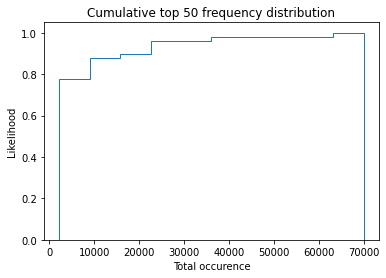

In [29]:
plt.hist(top50,density=True,histtype='step',cumulative=True)
plt.title('Cumulative top 50 frequency distribution')
plt.xlabel('Total occurence')
plt.ylabel('Likelihood')

In [32]:
## Laplace smoothing 


In [33]:
V=len(mle_unigram_dist)

In [36]:
Lm_biagram=bigram_N+(V**2)

In [38]:
from collections import defaultdict
lm_uni = defaultdict(lambda: 0)
for x in mle_unigram_dist:
    lm_uni[x] = mle_unigram_dist[x] +  V

In [40]:
lm_bigram  = defaultdict(lambda: 1)
for w in mle_bigram_dist:
    lm_bigram[w] = mle_bigram_dist[w] + 1

In [30]:
# 1  P(the | in) before smothing/  Maximum Likelihood Estimate
print(mle_bigram_dist['in','the']/ mle_unigram_dist['in'])

0.2823733420818297


In [31]:
# P(the|in) after smothing

In [41]:
print(lm_bigram['in','the']/lm_uni['in'])

0.08469192714189341


In [ ]:
# 2  P(in the) before smothing 
print(mle_bigram_dist['in','the']/bigram_N)

0.005188638217140849


In [ ]:
#    P(in the) after smothing

In [42]:
print(lm_bigram['in','the']/Lm_biagram)

2.4272006792153355e-06


In [ ]:
# 3  P(said the) before smothing/  Maximum Likelihood Estimate
print(mle_bigram_dist['said','the']/bigram_N)

6.372767270845193e-05


In [ ]:
#    P(said the) after smothing

In [43]:
print(lm_bigram['said','the']/Lm_biagram)

3.020910237987889e-08


In [ ]:
# 4  P(the|said) before smothing/  Maximum Likelihood Estimate
print(mle_bigram_dist['said','the']/ mle_unigram_dist['said'])

0.03773584905660377


In [ ]:
#    P(the|said) after smothing

In [44]:
print(lm_bigram['said','the']/lm_uni['said'])

0.0014485475896168108
